In [2]:
#importing necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import glob
import math
import pickle
import statistics
from sklearn import metrics
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
#finds all the pathnames with .csv format
all_files = glob.glob('*.csv')
#removing MTeamSpellings.csv file from list
all_files.remove('MTeamSpellings.csv')
all_files

['MNCAATourneyDetailedResults.csv',
 'MNCAATourneyCompactResults.csv',
 'MSeasons.csv',
 'MEvents2018.csv',
 'MEvents2019.csv',
 'MPlayers.csv',
 'MRegularSeasonDetailedResults.csv',
 'MNCAATourneySlots.csv',
 'MGameCities.csv',
 'MSampleSubmissionStage1_2020.csv',
 'MConferenceTourneyGames.csv',
 'Cities.csv',
 'MRegularSeasonCompactResults.csv',
 'MNCAATourneySeedRoundSlots.csv',
 'MTeamConferences.csv',
 'MTeamCoaches.csv',
 'MEvents2017.csv',
 'MMasseyOrdinals.csv',
 'MEvents2016.csv',
 'Conferences.csv',
 'MTeams.csv',
 'MNCAATourneySeeds.csv',
 'MEvents2015.csv',
 'MSecondaryTourneyTeams.csv',
 'MSecondaryTourneyCompactResults.csv']

In [3]:
#create empty dictionary
dic = {}
#for loop through all_files list counting the iteration using enumerate
for idx, i in enumerate(all_files):
    #reading in new dataframe naming each as df + the iteration number assigned
    exec(f'df{idx} = pd.read_csv(i)')
    #assign name of csv file to the df file it refers to
    dic['df' + str(idx)] = i

In [4]:
#for loop printing first 5 rows of each dataframe
for x in dic:
    #print csv file name
    print(dic[x])
    #display first 5 rows of dataframe
    exec(f'display({x}.head())')
    print()
    print()
    print()
    print()
#print dictionary for further use
dic

MNCAATourneyDetailedResults.csv


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19






MNCAATourneyCompactResults.csv


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0






MSeasons.csv


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast






MEvents2018.csv


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,7850408,2018,11,1104,1272,82,70,0,0,15,1104,130,made3,unk,0,0,0
1,7850409,2018,11,1104,1272,82,70,0,0,15,1104,129,assist,NaN,0,0,0
2,7850410,2018,11,1104,1272,82,70,0,0,39,1272,6242,turnover,unk,0,0,0
3,7850411,2018,11,1104,1272,82,70,0,0,43,1104,143,miss2,jump,0,0,0
4,7850412,2018,11,1104,1272,82,70,0,0,43,1104,129,reb,off,0,0,0






MEvents2019.csv


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,10442717,2019,1,1104,1380,82,62,0,0,18,1380,10314,made2,jump,0,0,0
1,10442718,2019,1,1104,1380,82,62,0,0,18,1380,10307,assist,NaN,0,0,0
2,10442719,2019,1,1104,1380,82,62,0,0,42,1104,129,made2,jump,0,0,0
3,10442720,2019,1,1104,1380,82,62,0,0,58,1380,10303,turnover,unk,0,0,0
4,10442721,2019,1,1104,1380,82,62,0,0,63,1104,143,made3,unk,0,0,0






MPlayers.csv


,PlayerID,LastName,FirstName,TeamID
0,1,Albright,Christian,1101
1,2,Cameron,Tobias,1101
2,3,Cobb,Chase,1101
3,4,Cooke,Austin,1101
4,5,Crnic,Jovan,1101






MRegularSeasonDetailedResults.csv


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14






MNCAATourneySlots.csv


,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12






MGameCities.csv


,Season,DayNum,WTeamID,LTeamID,CRType,CityID
0,2010,7,1143,1293,Regular,4027
1,2010,7,1314,1198,Regular,4061
2,2010,7,1326,1108,Regular,4080
3,2010,7,1393,1107,Regular,4340
4,2010,9,1143,1178,Regular,4027






MSampleSubmissionStage1_2020.csv


,ID,Pred
0,2015_1107_1112,0.5
1,2015_1107_1116,0.5
2,2015_1107_1124,0.5
3,2015_1107_1125,0.5
4,2015_1107_1129,0.5






MConferenceTourneyGames.csv


,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194
3,2001,a_sun,122,1359,1239
4,2001,a_sun,122,1391,1273






Cities.csv


,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY
3,4004,Albuquerque,NM
4,4005,Allentown,PA






MRegularSeasonCompactResults.csv


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0






MNCAATourneySeedRoundSlots.csv


,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144
3,W01,4,R4W1,145,146
4,W01,5,R5WX,152,152






MTeamConferences.csv


,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec
3,1985,1106,swac
4,1985,1108,swac






MTeamCoaches.csv


,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson
3,1985,1106,0,154,james_oliver
4,1985,1108,0,154,davey_whitney






MEvents2017.csv


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,5216688,2017,11,1104,1157,70,53,0,0,0,1104,6977,sub,in,0,0,0
1,5216689,2017,11,1104,1157,70,53,0,0,15,1157,1899,foul,unk,0,0,0
2,5216690,2017,11,1104,1157,70,53,0,0,15,1157,1899,turnover,unk,0,0,0
3,5216691,2017,11,1104,1157,70,53,0,0,26,1104,140,made3,unk,0,0,0
4,5216692,2017,11,1104,1157,70,53,0,0,26,1104,151,assist,NaN,0,0,0






MMasseyOrdinals.csv


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260






MEvents2016.csv


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,2560826,2016,11,1104,1244,77,64,0,0,13,1104,151,miss2,lay,0,0,0
1,2560827,2016,11,1104,1244,77,64,0,0,13,1104,151,reb,off,0,0,0
2,2560828,2016,11,1104,1244,77,64,0,0,16,1244,5199,foul,unk,0,0,0
3,2560829,2016,11,1104,1244,77,64,0,0,16,1104,151,miss1,unk,0,0,0
4,2560830,2016,11,1104,1244,77,64,0,0,16,1104,0,reb,deadb,0,0,0






Conferences.csv


,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference






MTeams.csv


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2020
1,1102,Air Force,1985,2020
2,1103,Akron,1985,2020
3,1104,Alabama,1985,2020
4,1105,Alabama A&M,2000,2020






MNCAATourneySeeds.csv


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374






MEvents2015.csv


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,100,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,11784,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,0,27,1420,11789,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,0,27,1420,11803,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,0,0,59,1103,87,made2,jump,0,0,0






MSecondaryTourneyTeams.csv


,Season,SecondaryTourney,TeamID
0,1985,NIT,1108
1,1985,NIT,1133
2,1985,NIT,1139
3,1985,NIT,1145
4,1985,NIT,1151






MSecondaryTourneyCompactResults.csv


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney
0,1985,136,1151,67,1155,65,H,0,NIT
1,1985,136,1153,77,1245,61,H,0,NIT
2,1985,136,1201,79,1365,76,H,0,NIT
3,1985,136,1231,79,1139,57,H,0,NIT
4,1985,136,1249,78,1222,71,H,0,NIT


{'df0': 'MNCAATourneyDetailedResults.csv',
 'df1': 'MNCAATourneyCompactResults.csv',
 'df2': 'MSeasons.csv',
 'df3': 'MEvents2018.csv',
 'df4': 'MEvents2019.csv',
 'df5': 'MPlayers.csv',
 'df6': 'MRegularSeasonDetailedResults.csv',
 'df7': 'MNCAATourneySlots.csv',
 'df8': 'MGameCities.csv',
 'df9': 'MSampleSubmissionStage1_2020.csv',
 'df10': 'MConferenceTourneyGames.csv',
 'df11': 'Cities.csv',
 'df12': 'MRegularSeasonCompactResults.csv',
 'df13': 'MNCAATourneySeedRoundSlots.csv',
 'df14': 'MTeamConferences.csv',
 'df15': 'MTeamCoaches.csv',
 'df16': 'MEvents2017.csv',
 'df17': 'MMasseyOrdinals.csv',
 'df18': 'MEvents2016.csv',
 'df19': 'Conferences.csv',
 'df20': 'MTeams.csv',
 'df21': 'MNCAATourneySeeds.csv',
 'df22': 'MEvents2015.csv',
 'df23': 'MSecondaryTourneyTeams.csv',
 'df24': 'MSecondaryTourneyCompactResults.csv'}

In [5]:
#for loop iterating through Last Day number in coach dataframe
for idx, x in enumerate(df15.LastDayNum):
    #place difference between Last Day and First Day of coaches' tenure
    #in new 'Days' column
    df15.loc[idx, 'Days'] = df15.LastDayNum.iloc[idx] - df15.FirstDayNum.iloc[idx]
#display first 5 rows of coach dataframe
df15.head()

,Season,TeamID,FirstDayNum,LastDayNum,CoachName,Days
0,1985,1102,0,154,reggie_minton,154.0
1,1985,1103,0,154,bob_huggins,154.0
2,1985,1104,0,154,wimp_sanderson,154.0
3,1985,1106,0,154,james_oliver,154.0
4,1985,1108,0,154,davey_whitney,154.0


In [26]:
#for loop iterating through a list of unique coaches in coach dataframe
for i in list(df15.CoachName.unique()):
    #create proxy dataframe of unique coach
    proxycoach = df15[df15.CoachName == i]
    proxycoach.reset_index(inplace = True)
    #save original indices for later
    proxycoach.rename(columns = {'index': 'bar'}, inplace = True)

    #for loop iterating through season column of proxy dataframe
    for idx, x in enumerate(proxycoach.Season):
        #if first row, place value of Days in the Tenure column
        if idx == 0:
            proxycoach.loc[idx, 'Tenure'] = proxycoach.Days.iloc[idx]
        #checking if the season in previous row is this year minus 1, hence subsequent years
        elif proxycoach.loc[idx - 1, 'Season'] == proxycoach.loc[idx, 'Season'] - 1:
            #checking if the team id of previous season's row is the same as this season's row
            if proxycoach.loc[idx - 1, 'TeamID'] == proxycoach.loc[idx, 'TeamID']:
                #place value of last season's Tenure plus this season's Days in the Tenure column
                proxycoach.loc[idx, 'Tenure'] = proxycoach.Tenure.iloc[idx - 1] + proxycoach.Days.iloc[idx]
            elif proxycoach.loc[idx - 1, 'TeamID'] != proxycoach.loc[idx, 'TeamID']:
                #place value of Days in the Tenure column
                proxycoach.loc[idx, 'Tenure'] = proxycoach.Days.iloc[idx]
        #if season value in previous row is not the immediate previous year to season value in current row
        elif proxycoach.loc[idx - 1, 'Season'] != proxycoach.loc[idx, 'Season'] - 1:
            #place value of Days in the Tenure column
            proxycoach.loc[idx, 'Tenure'] = proxycoach.Days.iloc[idx]
    
    #for loop iterating through bar column, referring to original indices
    for idx, x in enumerate(proxycoach.bar):
        #place Tenure value in approriate row for original coach dataframe
        df15.loc[x, 'CoachTenure'] = proxycoach.Tenure.iloc[idx]

//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [27]:
#display first 5 rows of coach dataframe
df15.head()

,Season,TeamID,FirstDayNum,LastDayNum,CoachName,Days,CoachTenure
0,1985,1102,0,154,reggie_minton,154.0,154.0
1,1985,1103,0,154,bob_huggins,154.0,154.0
2,1985,1104,0,154,wimp_sanderson,154.0,154.0
3,1985,1106,0,154,james_oliver,154.0,154.0
4,1985,1108,0,154,davey_whitney,154.0,154.0


In [15]:
#de-serialize team dataframe
df20 = pd.read_pickle("previousstats.pkl")
df20

,TeamID,TeamName,FirstD1Season,LastD1Season,2014,2015,2016,2017,2018,2019,...,Adiff2019,TOdiff2019,STdiff2019,BLKdiff2019,PFdiff2019,TS2019,Pace2019,ORTG2019,DRTG2019,NRTG2019
0,1101,Abilene Chr,2014,2020,0.0,1.0,2.0,3.0,4.0,5.0,...,102,-118,71,-12,31,16.191316,9733.562500,31.059481,28.056502,3.002980
1,1102,Air Force,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,-24,32,-72,-28,-7,16.734795,10598.250000,30.618312,32.761546,-2.143235
2,1103,Akron,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,53,-37,-4,15,-1,15.983116,10654.000000,30.814552,29.133766,1.680786
3,1104,Alabama,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,27,57,-57,12,-68,17.633621,11530.250000,33.810603,33.725482,0.085121
4,1105,Alabama A&M,2000,2020,14.0,15.0,16.0,17.0,18.0,19.0,...,-50,29,-12,-60,124,15.434484,10905.937500,28.460432,33.614364,-5.153932
5,1106,Alabama St,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,-121,-5,-32,-12,-36,14.395397,10004.750000,27.632846,30.788551,-3.155705
6,1107,SUNY Albany,2000,2020,14.0,15.0,16.0,17.0,18.0,19.0,...,-57,50,-10,-36,17,16.536282,10431.687500,30.770797,31.996965,-1.226168
7,1108,Alcorn St,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,-131,107,-43,17,60,13.261590,9141.312500,24.104419,29.208648,-5.104229
8,1109,Alliant Intl,1985,1991,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
9,1110,American Univ,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,27,20,30,33,-6,16.895844,10321.000000,31.384768,30.048026,1.336742


In [16]:
#for loop iterating through each season
for year in [2014, 2015, 2016, 2017, 2018, 2019]:
    #store new values for total games played by season in teams dataframe
    df20['TotalG' + str(year)] = df20['Wins' + str(year)] + df20['Losses' + str(year)]
    #divide values in each column of teams dataframe by total games played by season
    df20['Scorediff' + str(year)] = df20['Scorediff' + str(year)]/df20['TotalG' + str(year)]
    df20['2FG%diff' + str(year)] = df20['2FG%diff' + str(year)]/df20['TotalG' + str(year)]
    df20['3FG%diff' + str(year)] = df20['3FG%diff' + str(year)]/df20['TotalG' + str(year)]
    df20['FT%diff' + str(year)] = df20['FT%diff' + str(year)]/df20['TotalG' + str(year)]
    df20['2FGMdiff' + str(year)] = df20['2FGMdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['3FGMdiff' + str(year)] = df20['3FGMdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['FTMdiff' + str(year)] = df20['FTMdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['2FGAdiff' + str(year)] = df20['2FGAdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['3FGAdiff' + str(year)] = df20['3FGAdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['FTAdiff' + str(year)] = df20['FTAdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['ORdiff' + str(year)] = df20['ORdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['DRdiff' + str(year)] = df20['DRdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['TRdiff' + str(year)] = df20['TRdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['Adiff' + str(year)] = df20['Adiff' + str(year)]/df20['TotalG' + str(year)]
    df20['TOdiff' + str(year)] = df20['TOdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['STdiff' + str(year)] = df20['STdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['BLKdiff' + str(year)] = df20['BLKdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['PFdiff' + str(year)] = df20['PFdiff' + str(year)]/df20['TotalG' + str(year)]
    df20['TS' + str(year)] = df20['TS' + str(year)]/df20['TotalG' + str(year)]
    df20['Pace' + str(year)] = df20['Pace' + str(year)]/df20['TotalG' + str(year)]
    df20['ORTG' + str(year)] = df20['ORTG' + str(year)]/df20['TotalG' + str(year)]
    df20['DRTG' + str(year)] = df20['DRTG' + str(year)]/df20['TotalG' + str(year)]
    df20['NRTG' + str(year)] = df20['NRTG' + str(year)]/df20['TotalG' + str(year)]

In [17]:
#display teams dataframe
df20

,TeamID,TeamName,FirstD1Season,LastD1Season,2014,2015,2016,2017,2018,2019,...,Pace2019,ORTG2019,DRTG2019,NRTG2019,TotalG2014,TotalG2015,TotalG2016,TotalG2017,TotalG2018,TotalG2019
0,1101,Abilene Chr,2014,2020,0.0,1.0,2.0,3.0,4.0,5.0,...,335.640086,1.071017,0.967466,0.103551,21,28,27,25,27,29
1,1102,Air Force,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,341.879032,0.987687,1.056824,-0.069137,28,29,30,31,29,31
2,1103,Akron,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,343.677419,0.994018,0.939799,0.054219,33,34,33,33,31,31
3,1104,Alabama,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,349.401515,1.024564,1.021984,0.002579,31,31,32,33,34,33
4,1105,Alabama A&M,2000,2020,14.0,15.0,16.0,17.0,18.0,19.0,...,340.810547,0.889388,1.050449,-0.161060,28,28,28,29,31,32
5,1106,Alabama St,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,344.991379,0.952857,1.061674,-0.108817,28,27,29,30,31,29
6,1107,SUNY Albany,2000,2020,14.0,15.0,16.0,17.0,18.0,19.0,...,336.506048,0.992606,1.032160,-0.039554,32,32,31,33,31,31
7,1108,Alcorn St,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,338.567130,0.892756,1.081802,-0.189046,28,30,28,29,28,27
8,1109,Alliant Intl,1985,1991,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
9,1110,American Univ,1985,2020,29.0,30.0,31.0,32.0,33.0,34.0,...,344.033333,1.046159,1.001601,0.044558,32,33,31,30,30,30


In [19]:
#de-serializing dataframes
example2 = pd.read_pickle("2017events.pkl")
example3 = pd.read_pickle("2018events.pkl")
example4 = pd.read_pickle("2019events.pkl")

In [20]:
#de-serializing cleaned up train dataframe
Xtrain = pd.read_pickle("2017-19trainstats")

In [21]:
#create test dataframe by copying tournament detailed results dataframe for seasons 2017-2019
#and restricting DayNum to 136 or 137 for first round matchups only
Xtest = df0[df0.Season >= 2017]
Xtest = Xtest[Xtest.DayNum <= 137]
Xtest = Xtest[Xtest.DayNum >= 136]
#reset index
Xtest.reset_index(drop = True, inplace = True)
#display first 5 rows of test dataframe
Xtest.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2017,136,1112,100,1315,82,N,0,36,62,...,22,8,16,9,22,18,6,6,2,23
1,2017,136,1139,76,1457,64,N,0,24,49,...,25,5,10,3,24,12,9,6,1,22
2,2017,136,1196,80,1190,65,N,0,26,54,...,24,6,10,13,19,12,17,9,0,19
3,2017,136,1199,86,1195,80,N,0,30,54,...,28,14,20,7,19,18,11,6,1,23
4,2017,136,1211,66,1355,46,N,0,25,63,...,20,5,11,9,29,8,13,3,4,17


In [22]:
def create_dataset(test):
    
    '''Pass in season detailed results dataframe as an argument.
    Returns a dataframe where rows correspond to unique games,
    and columns correspond to averages of statistics up to the date of that game or
    stats of that specific game.
    
    Function will make a copy of the argument, then
    iterate through the copy's rows (each corresponding to a specific game), for which it will
    store season averages of per game, advanced, season and current game stats
    for both winning and losing teams.
    All features present in the train dataframe will be computed or stored into new copy dataframe,
    including event stats and lag statistics.
    '''
    #copy dataframe
    new = test.copy()
    
    #for loop iterating through winning team ID column in new dataframe
    for idx, x in enumerate(new.WTeamID):
        
        #assign value of Season column of current row to season variable
        season = new.Season.iloc[idx]
        
        #find index of winning and losing teams in teams dataframe using team ID from data dataframe
        idxl = df20[df20['TeamID'] == new['LTeamID'].iloc[idx]].index.tolist()[0]
        idxw = df20[df20['TeamID'] == new['WTeamID'].iloc[idx]].index.tolist()[0]

        #store statistics value from teams dataframe into new dataframe for both winning and losing team
        new.loc[idx, 'WScorediff'] = df20['Scorediff' + str(season)].iloc[idxw]
        new.loc[idx, 'W2FG%diff'] = df20['2FG%diff' + str(season)].iloc[idxw]
        new.loc[idx, 'W3FG%diff'] = df20['3FG%diff' + str(season)].iloc[idxw]
        new.loc[idx, 'WFT%diff'] = df20['FT%diff' + str(season)].iloc[idxw]
        new.loc[idx, 'W2FGMdiff'] = df20['2FGMdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'W3FGMdiff'] = df20['3FGMdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'WFTMdiff'] = df20['FTMdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'W2FGAdiff'] = df20['2FGAdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'W3FGAdiff'] = df20['3FGAdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'WFTAdiff'] = df20['FTAdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'WORdiff'] = df20['ORdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'WDRdiff'] = df20['DRdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'WTRdiff'] = df20['TRdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'WAdiff'] = df20['Adiff' + str(season)].iloc[idxw]
        new.loc[idx, 'WTOdiff'] = df20['TOdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'WSTdiff'] = df20['STdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'WBLKdiff'] = df20['BLKdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'WPFdiff'] = df20['PFdiff' + str(season)].iloc[idxw]
        new.loc[idx, 'WTS'] = df20['TS' + str(season)].iloc[idxw]
        new.loc[idx, 'WPace'] = df20['Pace' + str(season)].iloc[idxw]
        new.loc[idx, 'WORTG'] = df20['ORTG' + str(season)].iloc[idxw]
        new.loc[idx, 'WDRTG'] = df20['DRTG' + str(season)].iloc[idxw]
        new.loc[idx, 'WNRTG'] = df20['NRTG' + str(season)].iloc[idxw]

        new.loc[idx, 'LScorediff'] = df20['Scorediff' + str(season)].iloc[idxl]
        new.loc[idx, 'L2FG%diff'] = df20['2FG%diff' + str(season)].iloc[idxl]
        new.loc[idx, 'L3FG%diff'] = df20['3FG%diff' + str(season)].iloc[idxl]
        new.loc[idx, 'LFT%diff'] = df20['FT%diff' + str(season)].iloc[idxl]
        new.loc[idx, 'L2FGMdiff'] = df20['2FGMdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'L3FGMdiff'] = df20['3FGMdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'LFTMdiff'] = df20['FTMdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'L2FGAdiff'] = df20['2FGAdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'L3FGAdiff'] = df20['3FGAdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'LFTAdiff'] = df20['FTAdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'LORdiff'] = df20['ORdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'LDRdiff'] = df20['DRdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'LTRdiff'] = df20['TRdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'LAdiff'] = df20['Adiff' + str(season)].iloc[idxl]
        new.loc[idx, 'LTOdiff'] = df20['TOdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'LSTdiff'] = df20['STdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'LBLKdiff'] = df20['BLKdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'LPFdiff'] = df20['PFdiff' + str(season)].iloc[idxl]
        new.loc[idx, 'LTS'] = df20['TS' + str(season)].iloc[idxl]
        new.loc[idx, 'LPace'] = df20['Pace' + str(season)].iloc[idxl]
        new.loc[idx, 'LORTG'] = df20['ORTG' + str(season)].iloc[idxl]
        new.loc[idx, 'LDRTG'] = df20['DRTG' + str(season)].iloc[idxl]
        new.loc[idx, 'LNRTG'] = df20['NRTG' + str(season)].iloc[idxl]
        new.loc[idx, 'WTmPoints'] = df20['TmPoints' + str(season)][idxw]
        new.loc[idx, 'WOppPoints'] = df20['OppPoints' + str(season)][idxw]
        new.loc[idx, 'LTmPoints'] = df20['TmPoints' + str(season)][idxl]
        new.loc[idx, 'LOppPoints'] = df20['OppPoints' + str(season)][idxl]

        new.loc[idx, 'WWinsCount'] = df20['Wins' + str(season)].iloc[idxw]
        new.loc[idx, 'LWinsCount'] = df20['Wins' + str(season)].iloc[idxl]
        new.loc[idx, 'WLossesCount'] = df20['Losses' + str(season)].iloc[idxw]
        new.loc[idx, 'LLossesCount'] = df20['Losses' + str(season)].iloc[idxl]
        new.loc[idx, 'WWPyth'] = df20['TotalG' + str(season)][idxw] * (math.pow(df20['TmPoints' + str(season)][idxw],  9) / sum([math.pow(df20['TmPoints' + str(season)][idxw],  9), math.pow(df20['OppPoints' + str(season)][idxw],  9)]))
        new.loc[idx, 'LWPyth'] = df20['TotalG' + str(season)][idxl] * (math.pow(df20['TmPoints' + str(season)][idxl],  9) / sum([math.pow(df20['TmPoints' + str(season)][idxl],  9), math.pow(df20['OppPoints' + str(season)][idxl],  9)]))
        new.loc[idx, 'WRealWinsDiff'] = new.WWinsCount.iloc[idx] - new.WWPyth.iloc[idx]
        new.loc[idx, 'LRealWinsDiff'] = new.LWinsCount.iloc[idx] - new.LWPyth.iloc[idx]
        
        #using season column, where values equal length of being a DI program,
        #store the difference in new dataframe
        new.loc[idx, 'Existencediff'] = df20[str(season)][idxw] - df20[str(season)][idxl]

        #create proxy dataframe of rating system dataframe where season equals season for the row currently on
        proxy = df17[df17['Season'] == season]
        #restrict RankingDayNum to less than or equal to current DayNum value in row currently on
        proxy = proxy[proxy['RankingDayNum'] <= new['DayNum'][idx]]
        #create new proxy win and lose dataframes for winning and losing teams
        proxyw = proxy[proxy['TeamID'] == x]
        proxyl = proxy[proxy['TeamID'] == new['LTeamID'][idx]]
        #pass if either dataframes are empty
        if proxyw.empty == True:
            pass
        elif proxyl.empty == True:
            pass
        #if both not empty, take difference of averages of most recent days ranking values for the two teams
        else:
            proxyw = proxyw[proxyw['RankingDayNum'] == proxyw['RankingDayNum'].iloc[-1]]
            proxyl = proxyl[proxyl['RankingDayNum'] == proxyl['RankingDayNum'].iloc[-1]]
            #store rank difference value in new dataframe
            new.loc[idx, 'Rankdiff'] = proxyl.OrdinalRank.mean() - proxyw.OrdinalRank.mean()

        #if, elif statements checking location of game and storing in new binary categorical columns
        if new.WLoc.iloc[idx] == 'H':
            new.loc[idx, 'WH'] = 1
            new.loc[idx, 'WA'] = 0
            new.loc[idx, 'WN'] = 0
            new.loc[idx, 'LH'] = 0
            new.loc[idx, 'LA'] = 1
            new.loc[idx, 'LN'] = 0
        elif new.WLoc.iloc[idx] == 'A':
            new.loc[idx, 'WH'] = 0
            new.loc[idx, 'WA'] = 1
            new.loc[idx, 'WN'] = 0
            new.loc[idx, 'LH'] = 1
            new.loc[idx, 'LA'] = 0
            new.loc[idx, 'LN'] = 0
        elif new.WLoc.iloc[idx] == 'N':
            new.loc[idx, 'WH'] = 0
            new.loc[idx, 'WA'] = 0
            new.loc[idx, 'WN'] = 1
            new.loc[idx, 'LH'] = 0
            new.loc[idx, 'LA'] = 0
            new.loc[idx, 'LN'] = 1

        #create new proxy dataframe of coach dataframe where season values are equals season
        #for the row we are currently on
        coachdiff = df15[df15['Season'] == season]
        #new winning and losing teams dataframes made from coach proxy dataframe
        coachdiffw = coachdiff[coachdiff['TeamID'] == x]
        coachdiffl = coachdiff[coachdiff['TeamID'] == new['LTeamID'][idx]]

        #for loop iterating through LastDayNum values in winning coach dataframe
        for r, s in enumerate(coachdiffw.LastDayNum):
            #pass if DayNum of row currently on is greater than coaches Last Day as coach for that season
            if new.DayNum.iloc[idx] > s:
                pass
            #assign daysw with number of days as coach of that program
            #if DayNum of row currently on is less than or equals coaches Last Day as coach for that season
            elif new.DayNum.iloc[idx] <= s:
                daysw = coachdiffw.CoachTenure.iloc[r] - (s - new.DayNum.iloc[idx])

        #for loop iterating through LastDayNum values in losing coach dataframe
        for r, s in enumerate(coachdiffl.LastDayNum):
            #pass if DayNum of row currently on is greater than coaches Last Day as coach for that season
            if new.DayNum.iloc[idx] > s:
                pass
            #assign daysl with number of days as coach of that program
            #if DayNum of row currently on is less than or equals coaches Last Day as coach for that season
            elif new.DayNum.iloc[idx] <= s:
                daysl = coachdiffl.CoachTenure.iloc[r] - (s - new.DayNum.iloc[idx])

        #store difference in daysw and daysl in new dataframe
        new.loc[idx, 'Coachdiff'] = daysw - daysl
        
        #copy event stats to i variable
        if season == 2017:
            i = example2.copy()
        elif season == 2018:
            i = example3.copy()
        elif season == 2019:
            i = example4.copy()
        
        #create winning and losing team proxy dataframes where DayNum value is less than current rows' DayNum value 
        teamw = i[i.WTeamID == x]
        teaml = i[i.LTeamID == new.LTeamID.iloc[idx]]
        teamw = teamw[teamw.DayNum < new.DayNum.iloc[idx]]
        teaml = teaml[teaml.DayNum < new.DayNum.iloc[idx]]
        
        #pass if winning or losing team dataframe is empty
        if teamw.empty == True:
            pass
        elif teaml.empty == True:
            pass
        else:
            #store the very last rows shooting percentages in df dataframe where all final statistics are kept
            new.loc[idx, 'Wfhf52'] = teamw['W2%1'].iloc[-1]
            new.loc[idx, 'Wfhl52'] = teamw['W2%2'].iloc[-1]
            new.loc[idx, 'Wshf52'] = teamw['W2%3'].iloc[-1]
            new.loc[idx, 'Wshl52'] = teamw['W2%4'].iloc[-1]

            new.loc[idx, 'Lfhf52'] = teaml['L2%1'].iloc[-1]
            new.loc[idx, 'Lfhl52'] = teaml['L2%2'].iloc[-1]
            new.loc[idx, 'Lshf52'] = teaml['L2%3'].iloc[-1]
            new.loc[idx, 'Lshl52'] = teaml['L2%4'].iloc[-1]


            new.loc[idx, 'Wfhf53'] = teamw['W3%1'].iloc[-1]
            new.loc[idx, 'Wfhl53'] = teamw['W3%2'].iloc[-1]
            new.loc[idx, 'Wshf53'] = teamw['W3%3'].iloc[-1]
            new.loc[idx, 'Wshl53'] = teamw['W3%4'].iloc[-1]

            new.loc[idx, 'Lfhf53'] = teaml['L3%1'].iloc[-1]
            new.loc[idx, 'Lfhl53'] = teaml['L3%2'].iloc[-1]
            new.loc[idx, 'Lshf53'] = teaml['L3%3'].iloc[-1]
            new.loc[idx, 'Lshl53'] = teaml['L3%4'].iloc[-1]


            new.loc[idx, 'Wfhf5FT'] = teamw['WFT1'].iloc[-1]
            new.loc[idx, 'Wfhl5FT'] = teamw['WFT2'].iloc[-1]
            new.loc[idx, 'Wshf5FT'] = teamw['WFT3'].iloc[-1]
            new.loc[idx, 'Wshl5FT'] = teamw['WFT4'].iloc[-1]

            new.loc[idx, 'Lfhf5FT'] = teaml['LFT1'].iloc[-1]
            new.loc[idx, 'Lfhl5FT'] = teaml['LFT2'].iloc[-1]
            new.loc[idx, 'Lshf5FT'] = teaml['LFT3'].iloc[-1]
            new.loc[idx, 'Lshl5FT'] = teaml['LFT4'].iloc[-1]        

        #assign lag as -3    
        lag = -3
        #for loop iterating through list of values
        for year in [season - 3, season - 2, season - 1]:
            #store season averages for correponding lag season for winning and losing teams
            new.loc[idx, 'WScorediff' + str(lag)] = df20['Scorediff' + str(year)].iloc[idxw]
            new.loc[idx, 'W2FG%diff' + str(lag)] = df20['2FG%diff' + str(year)].iloc[idxw]
            new.loc[idx, 'W3FG%diff' + str(lag)] = df20['3FG%diff' + str(year)].iloc[idxw]
            new.loc[idx, 'WFT%diff' + str(lag)] = df20['FT%diff' + str(year)].iloc[idxw]
            new.loc[idx, 'W2FGMdiff' + str(lag)] = df20['2FGMdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'W3FGMdiff' + str(lag)] = df20['3FGMdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'WFTMdiff' + str(lag)] = df20['FTMdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'W2FGAdiff' + str(lag)] = df20['2FGAdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'W3FGAdiff' + str(lag)] = df20['3FGAdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'WFTAdiff' + str(lag)] = df20['FTAdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'WORdiff' + str(lag)] = df20['ORdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'WDRdiff' + str(lag)] = df20['DRdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'WTRdiff' + str(lag)] = df20['TRdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'WAdiff' + str(lag)] = df20['Adiff' + str(year)].iloc[idxw]
            new.loc[idx, 'WTOdiff' + str(lag)] = df20['TOdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'WSTdiff' + str(lag)] = df20['STdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'WBLKdiff' + str(lag)] = df20['BLKdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'WPFdiff' + str(lag)] = df20['PFdiff' + str(year)].iloc[idxw]
            new.loc[idx, 'WTS' + str(lag)] = df20['TS' + str(year)].iloc[idxw]
            new.loc[idx, 'WPace' + str(lag)] = df20['Pace' + str(year)].iloc[idxw]
            new.loc[idx, 'WORTG' + str(lag)] = df20['ORTG' + str(year)].iloc[idxw]
            new.loc[idx, 'WDRTG' + str(lag)] = df20['DRTG' + str(year)].iloc[idxw]
            new.loc[idx, 'WNRTG' + str(lag)] = df20['NRTG' + str(year)].iloc[idxw]

            new.loc[idx, 'LScorediff' + str(lag)] = df20['Scorediff' + str(year)].iloc[idxl]
            new.loc[idx, 'L2FG%diff' + str(lag)] = df20['2FG%diff' + str(year)].iloc[idxl]
            new.loc[idx, 'L3FG%diff' + str(lag)] = df20['3FG%diff' + str(year)].iloc[idxl]
            new.loc[idx, 'LFT%diff' + str(lag)] = df20['FT%diff' + str(year)].iloc[idxl]
            new.loc[idx, 'L2FGMdiff' + str(lag)] = df20['2FGMdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'L3FGMdiff' + str(lag)] = df20['3FGMdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'LFTMdiff' + str(lag)] = df20['FTMdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'L2FGAdiff' + str(lag)] = df20['2FGAdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'L3FGAdiff' + str(lag)] = df20['3FGAdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'LFTAdiff' + str(lag)] = df20['FTAdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'LORdiff' + str(lag)] = df20['ORdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'LDRdiff' + str(lag)] = df20['DRdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'LTRdiff' + str(lag)] = df20['TRdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'LAdiff' + str(lag)] = df20['Adiff' + str(year)].iloc[idxl]
            new.loc[idx, 'LTOdiff' + str(lag)] = df20['TOdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'LSTdiff' + str(lag)] = df20['STdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'LBLKdiff' + str(lag)] = df20['BLKdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'LPFdiff' + str(lag)] = df20['PFdiff' + str(year)].iloc[idxl]
            new.loc[idx, 'LTS' + str(lag)] = df20['TS' + str(year)].iloc[idxl]
            new.loc[idx, 'LPace' + str(lag)] = df20['Pace' + str(year)].iloc[idxl]
            new.loc[idx, 'LORTG' + str(lag)] = df20['ORTG' + str(year)].iloc[idxl]
            new.loc[idx, 'LDRTG' + str(lag)] = df20['DRTG' + str(year)].iloc[idxl]
            new.loc[idx, 'LNRTG' + str(lag)] = df20['NRTG' + str(year)].iloc[idxl]
            new.loc[idx, 'WTmPoints' + str(lag)] = df20['TmPoints' + str(year)][idxw]
            new.loc[idx, 'WOppPoints' + str(lag)] = df20['OppPoints' + str(year)][idxw]
            new.loc[idx, 'LTmPoints' + str(lag)] = df20['TmPoints' + str(year)][idxl]
            new.loc[idx, 'LOppPoints' + str(lag)] = df20['OppPoints' + str(year)][idxl]
            
            new.loc[idx, 'WWinsCount' + str(lag)] = df20['Wins' + str(year)].iloc[idxw]
            new.loc[idx, 'LWinsCount' + str(lag)] = df20['Wins' + str(year)].iloc[idxl]
            new.loc[idx, 'WLossesCount' + str(lag)] = df20['Losses' + str(year)].iloc[idxw]
            new.loc[idx, 'LLossesCount' + str(lag)] = df20['Losses' + str(year)].iloc[idxl]
            
            #add one to lag value
            lag += 1
        
        #after adding event stats and lag stats, store 1 if winning team has a lower team ID and 0 if not    
        if new.WTeamID.iloc[idx] < new.LTeamID.iloc[idx]:
            new.loc[idx, 'Target'] = 1
        elif new.LTeamID.iloc[idx] < new.WTeamID.iloc[idx]:
            new.loc[idx, 'Target'] = 0
        
        print index to keep track of row working on
        print(idx)
        
    #return dataframe
    return new

In [29]:
#run create_dataset function on Xtest
Xtest = create_dataset(Xtest)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


In [35]:
#create new train and test dataframes for 2017, 2018 and 2019 seasons seperately
Xtrain2017 = Xtrain[Xtrain.Season == 2017]
Xtrain2017.reset_index(drop = True, inplace = True)
Xtest2017 = Xtest[Xtest.Season == 2017]
Xtest2017.reset_index(drop = True, inplace = True)

Xtrain2018 = Xtrain[Xtrain.Season == 2018]
Xtrain2018.reset_index(drop = True, inplace = True)
Xtest2018 = Xtest[Xtest.Season == 2018]
Xtest2018.reset_index(drop = True, inplace = True)

Xtrain2019 = Xtrain[Xtrain.Season == 2019]
Xtrain2019.reset_index(drop = True, inplace = True)
Xtest2019 = Xtest[Xtest.Season == 2019]
Xtest2019.reset_index(drop = True, inplace = True)

In [36]:
def finish_dataset(dataset, old):
    
    '''Pass in empty dataframe and old train or test dataframe as arguments.
    finish_dataset takes the structure of a void function, not returning a value.
    
    Function iterates through each row of old train or test dataframe,
    storing values in empty dataframe with new column names in specific order.
    '''
    
    #for loop iterating through winning team ID column in old dataframe
    for idx, x in enumerate(old.WTeamID):
        #if winning team ID is lower than losing team ID
        #set all feature values of winning team as Team 1 and losing team as Team 2 in the new empty dataframe        
        if x < old.LTeamID.iloc[idx]:
            dataset.loc[idx, 'Team1Scorediff'] = old['WScorediff'].iloc[idx]
            dataset.loc[idx, 'Team12FG%diff'] = old['W2FG%diff'].iloc[idx]
            dataset.loc[idx, 'Team13FG%diff'] = old['W3FG%diff'].iloc[idx]
            dataset.loc[idx, 'Team1FT%diff'] =  old['WFT%diff'].iloc[idx]
            dataset.loc[idx, 'Team12FGMdiff'] = old['W2FGMdiff'].iloc[idx]
            dataset.loc[idx, 'Team13FGMdiff'] = old['W3FGMdiff'].iloc[idx]
            dataset.loc[idx, 'Team1FTMdiff'] = old['WFTMdiff'].iloc[idx]
            dataset.loc[idx, 'Team12FGAdiff'] = old['W2FGAdiff'].iloc[idx]
            dataset.loc[idx, 'Team13FGAdiff'] = old['W3FGAdiff'].iloc[idx]
            dataset.loc[idx, 'Team1FTAdiff'] = old['WFTAdiff'].iloc[idx]
            dataset.loc[idx, 'Team1ORdiff'] = old['WORdiff'].iloc[idx]
            dataset.loc[idx, 'Team1DRdiff'] = old['WDRdiff'].iloc[idx]
            dataset.loc[idx, 'Team1TRdiff'] = old['WTRdiff'].iloc[idx]
            dataset.loc[idx, 'Team1Adiff'] = old['WAdiff'].iloc[idx]
            dataset.loc[idx, 'Team1TOdiff'] = old['WTOdiff'].iloc[idx]
            dataset.loc[idx, 'Team1STdiff'] = old['WSTdiff'].iloc[idx]
            dataset.loc[idx, 'Team1BLKdiff'] = old['WBLKdiff'].iloc[idx]
            dataset.loc[idx, 'Team1PFdiff'] = old['WPFdiff'].iloc[idx]
            dataset.loc[idx, 'Team1TS'] = old['WTS'].iloc[idx]
            dataset.loc[idx, 'Team1Pace'] = old['WPace'].iloc[idx]
            dataset.loc[idx, 'Team1ORTG'] = old['WORTG'].iloc[idx]
            dataset.loc[idx, 'Team1DRTG'] = old['WDRTG'].iloc[idx]
            dataset.loc[idx, 'Team1NRTG'] = old['WNRTG'].iloc[idx]
            dataset.loc[idx, 'Team1fhf52'] = old['Wfhf52'].iloc[idx]
            dataset.loc[idx, 'Team1fhl52'] = old['Wfhl52'].iloc[idx]
            dataset.loc[idx, 'Team1shf52'] = old['Wshf52'].iloc[idx]
            dataset.loc[idx, 'Team1shl52'] = old['Wshl52'].iloc[idx]
            dataset.loc[idx, 'Team1fhf53'] = old['Wfhf53'].iloc[idx]
            dataset.loc[idx, 'Team1fhl53'] = old['Wfhl53'].iloc[idx]
            dataset.loc[idx, 'Team1shf53'] = old['Wshf53'].iloc[idx]
            dataset.loc[idx, 'Team1shl53'] = old['Wshl53'].iloc[idx]
            dataset.loc[idx, 'Team1fhf5FT'] = old['Wfhf5FT'].iloc[idx]
            dataset.loc[idx, 'Team1fhl5FT'] = old['Wfhl5FT'].iloc[idx]
            dataset.loc[idx, 'Team1shf5FT'] = old['Wshf5FT'].iloc[idx]
            dataset.loc[idx, 'Team1shl5FT'] = old['Wshl5FT'].iloc[idx]
            dataset.loc[idx, 'Team1TmPoints'] = old['WTmPoints'].iloc[idx]
            dataset.loc[idx, 'Team1OppPoints'] = old['WOppPoints'].iloc[idx]
            dataset.loc[idx, 'Team1WinsCount'] = old['WWinsCount'].iloc[idx]
            dataset.loc[idx, 'Team1LossesCount'] = old['WLossesCount'].iloc[idx]
            dataset.loc[idx, 'Team1WPyth'] = old['WWPyth'].iloc[idx]
            dataset.loc[idx, 'Team1RealWinsDiff'] = old['WRealWinsDiff'].iloc[idx]
            dataset.loc[idx, 'Team1H'] = old['WH'].iloc[idx]
            dataset.loc[idx, 'Team1A'] = old['WA'].iloc[idx]
            dataset.loc[idx, 'Team1N'] = old['WN'].iloc[idx]

            dataset.loc[idx, 'Team2Scorediff'] = old['LScorediff'].iloc[idx]
            dataset.loc[idx, 'Team22FG%diff'] = old['L2FG%diff'].iloc[idx]
            dataset.loc[idx, 'Team23FG%diff'] = old['L3FG%diff'].iloc[idx]
            dataset.loc[idx, 'Team2FT%diff'] =  old['LFT%diff'].iloc[idx]
            dataset.loc[idx, 'Team22FGMdiff'] = old['L2FGMdiff'].iloc[idx]
            dataset.loc[idx, 'Team23FGMdiff'] = old['L3FGMdiff'].iloc[idx]
            dataset.loc[idx, 'Team2FTMdiff'] = old['LFTMdiff'].iloc[idx]
            dataset.loc[idx, 'Team22FGAdiff'] = old['L2FGAdiff'].iloc[idx]
            dataset.loc[idx, 'Team23FGAdiff'] = old['L3FGAdiff'].iloc[idx]
            dataset.loc[idx, 'Team2FTAdiff'] = old['LFTAdiff'].iloc[idx]
            dataset.loc[idx, 'Team2ORdiff'] = old['LORdiff'].iloc[idx]
            dataset.loc[idx, 'Team2DRdiff'] = old['LDRdiff'].iloc[idx]
            dataset.loc[idx, 'Team2TRdiff'] = old['LTRdiff'].iloc[idx]
            dataset.loc[idx, 'Team2Adiff'] = old['LAdiff'].iloc[idx]
            dataset.loc[idx, 'Team2TOdiff'] = old['LTOdiff'].iloc[idx]
            dataset.loc[idx, 'Team2STdiff'] = old['LSTdiff'].iloc[idx]
            dataset.loc[idx, 'Team2BLKdiff'] = old['LBLKdiff'].iloc[idx]
            dataset.loc[idx, 'Team2PFdiff'] = old['LPFdiff'].iloc[idx]
            dataset.loc[idx, 'Team2TS'] = old['LTS'].iloc[idx]
            dataset.loc[idx, 'Team2Pace'] = old['LPace'].iloc[idx]
            dataset.loc[idx, 'Team2ORTG'] = old['LORTG'].iloc[idx]
            dataset.loc[idx, 'Team2DRTG'] = old['LDRTG'].iloc[idx]
            dataset.loc[idx, 'Team2NRTG'] = old['LNRTG'].iloc[idx]        
            dataset.loc[idx, 'Team2fhf52'] = old['Lfhf52'].iloc[idx]
            dataset.loc[idx, 'Team2fhl52'] = old['Lfhl52'].iloc[idx]
            dataset.loc[idx, 'Team2shf52'] = old['Lshf52'].iloc[idx]
            dataset.loc[idx, 'Team2shl52'] = old['Lshl52'].iloc[idx]
            dataset.loc[idx, 'Team2fhf53'] = old['Lfhf53'].iloc[idx]
            dataset.loc[idx, 'Team2fhl53'] = old['Lfhl53'].iloc[idx]
            dataset.loc[idx, 'Team2shf53'] = old['Lshf53'].iloc[idx]
            dataset.loc[idx, 'Team2shl53'] = old['Lshl53'].iloc[idx]
            dataset.loc[idx, 'Team2fhf5FT'] = old['Lfhf5FT'].iloc[idx]
            dataset.loc[idx, 'Team2fhl5FT'] = old['Lfhl5FT'].iloc[idx]
            dataset.loc[idx, 'Team2shf5FT'] = old['Lshf5FT'].iloc[idx]
            dataset.loc[idx, 'Team2shl5FT'] = old['Lshl5FT'].iloc[idx]        
            dataset.loc[idx, 'Team2TmPoints'] = old['LTmPoints'].iloc[idx]
            dataset.loc[idx, 'Team2OppPoints'] = old['LOppPoints'].iloc[idx]
            dataset.loc[idx, 'Team2WinsCount'] = old['LWinsCount'].iloc[idx]
            dataset.loc[idx, 'Team2LossesCount'] = old['LLossesCount'].iloc[idx]
            dataset.loc[idx, 'Team2WPyth'] = old['LWPyth'].iloc[idx]
            dataset.loc[idx, 'Team2RealWinsDiff'] = old['LRealWinsDiff'].iloc[idx]
            dataset.loc[idx, 'Team2H'] = old['LH'].iloc[idx]
            dataset.loc[idx, 'Team2A'] = old['LA'].iloc[idx]
            dataset.loc[idx, 'Team2N'] = old['LN'].iloc[idx]
            
            dataset.loc[idx, 'Existencediff'] = old['Existencediff'].iloc[idx]
            dataset.loc[idx, 'Coachdiff'] = old['Coachdiff'].iloc[idx]
            dataset.loc[idx, 'Rankdiff'] = old['Rankdiff'].iloc[idx]
            
            #for loop iterating through list of values
            for lag in [3, 2, 1]:
                dataset.loc[idx, 'Team1Scorediff-' + str(lag)] = old['WScorediff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team12FG%diff-' + str(lag)] = old['W2FG%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team13FG%diff-' + str(lag)] = old['W3FG%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1FT%diff-' + str(lag)] =  old['WFT%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team12FGMdiff-' + str(lag)] = old['W2FGMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team13FGMdiff-' + str(lag)] = old['W3FGMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1FTMdiff-' + str(lag)] = old['WFTMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team12FGAdiff-' + str(lag)] = old['W2FGAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team13FGAdiff-' + str(lag)] = old['W3FGAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1FTAdiff-' + str(lag)] = old['WFTAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1ORdiff-' + str(lag)] = old['WORdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1DRdiff-' + str(lag)] = old['WDRdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1TRdiff-' + str(lag)] = old['WTRdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1Adiff-' + str(lag)] = old['WAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1TOdiff-' + str(lag)] = old['WTOdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1STdiff-' + str(lag)] = old['WSTdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1BLKdiff-' + str(lag)] = old['WBLKdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1PFdiff-' + str(lag)] = old['WPFdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1TS-' + str(lag)] = old['WTS-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1Pace-' + str(lag)] = old['WPace-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1ORTG-' + str(lag)] = old['WORTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1DRTG-' + str(lag)] = old['WDRTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1NRTG-' + str(lag)] = old['WNRTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1TmPoints-' + str(lag)] = old['WTmPoints-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1OppPoints-' + str(lag)] = old['WOppPoints-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1WinsCount-' + str(lag)] = old['WWinsCount-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1LossesCount-' + str(lag)] = old['WLossesCount-' + str(lag)].iloc[idx]

                dataset.loc[idx, 'Team2Scorediff-' + str(lag)] = old['LScorediff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team22FG%diff-' + str(lag)] = old['L2FG%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team23FG%diff-' + str(lag)] = old['L3FG%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2FT%diff-' + str(lag)] =  old['LFT%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team22FGMdiff-' + str(lag)] = old['L2FGMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team23FGMdiff-' + str(lag)] = old['L3FGMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2FTMdiff-' + str(lag)] = old['LFTMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team22FGAdiff-' + str(lag)] = old['L2FGAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team23FGAdiff-' + str(lag)] = old['L3FGAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2FTAdiff-' + str(lag)] = old['LFTAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2ORdiff-' + str(lag)] = old['LORdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2DRdiff-' + str(lag)] = old['LDRdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2TRdiff-' + str(lag)] = old['LTRdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2Adiff-' + str(lag)] = old['LAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2TOdiff-' + str(lag)] = old['LTOdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2STdiff-' + str(lag)] = old['LSTdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2BLKdiff-' + str(lag)] = old['LBLKdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2PFdiff-' + str(lag)] = old['LPFdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2TS-' + str(lag)] = old['LTS-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2Pace-' + str(lag)] = old['LPace-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2ORTG-' + str(lag)] = old['LORTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2DRTG-' + str(lag)] = old['LDRTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2NRTG-' + str(lag)] = old['LNRTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2TmPoints-' + str(lag)] = old['LTmPoints-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2OppPoints-' + str(lag)] = old['LOppPoints-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2WinsCount-' + str(lag)] = old['LWinsCount-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2LossesCount-' + str(lag)] = old['LLossesCount-' + str(lag)].iloc[idx]

            #set Target column value the same as the old dataframe
            dataset.loc[idx, 'Target'] = old['Target'].iloc[idx]
            #print index value to keep track of row currently working on
            print(idx)
        
        #if losing team ID is lower than winning team ID
        #set all feature values of losing team as Team 1 and winning team as Team 2 in the new empty dataframe
        elif x > old.LTeamID.iloc[idx]:
            dataset.loc[idx, 'Team2Scorediff'] = old['WScorediff'].iloc[idx]
            dataset.loc[idx, 'Team22FG%diff'] = old['W2FG%diff'].iloc[idx]
            dataset.loc[idx, 'Team23FG%diff'] = old['W3FG%diff'].iloc[idx]
            dataset.loc[idx, 'Team2FT%diff'] =  old['WFT%diff'].iloc[idx]
            dataset.loc[idx, 'Team22FGMdiff'] = old['W2FGMdiff'].iloc[idx]
            dataset.loc[idx, 'Team23FGMdiff'] = old['W3FGMdiff'].iloc[idx]
            dataset.loc[idx, 'Team2FTMdiff'] = old['WFTMdiff'].iloc[idx]
            dataset.loc[idx, 'Team22FGAdiff'] = old['W2FGAdiff'].iloc[idx]
            dataset.loc[idx, 'Team23FGAdiff'] = old['W3FGAdiff'].iloc[idx]
            dataset.loc[idx, 'Team2FTAdiff'] = old['WFTAdiff'].iloc[idx]
            dataset.loc[idx, 'Team2ORdiff'] = old['WORdiff'].iloc[idx]
            dataset.loc[idx, 'Team2DRdiff'] = old['WDRdiff'].iloc[idx]
            dataset.loc[idx, 'Team2TRdiff'] = old['WTRdiff'].iloc[idx]
            dataset.loc[idx, 'Team2Adiff'] = old['WAdiff'].iloc[idx]
            dataset.loc[idx, 'Team2TOdiff'] = old['WTOdiff'].iloc[idx]
            dataset.loc[idx, 'Team2STdiff'] = old['WSTdiff'].iloc[idx]
            dataset.loc[idx, 'Team2BLKdiff'] = old['WBLKdiff'].iloc[idx]
            dataset.loc[idx, 'Team2PFdiff'] = old['WPFdiff'].iloc[idx]
            dataset.loc[idx, 'Team2TS'] = old['WTS'].iloc[idx]
            dataset.loc[idx, 'Team2Pace'] = old['WPace'].iloc[idx]
            dataset.loc[idx, 'Team2ORTG'] = old['WORTG'].iloc[idx]
            dataset.loc[idx, 'Team2DRTG'] = old['WDRTG'].iloc[idx]
            dataset.loc[idx, 'Team2NRTG'] = old['WNRTG'].iloc[idx]
            dataset.loc[idx, 'Team2fhf52'] = old['Wfhf52'].iloc[idx]
            dataset.loc[idx, 'Team2fhl52'] = old['Wfhl52'].iloc[idx]
            dataset.loc[idx, 'Team2shf52'] = old['Wshf52'].iloc[idx]
            dataset.loc[idx, 'Team2shl52'] = old['Wshl52'].iloc[idx]
            dataset.loc[idx, 'Team2fhf53'] = old['Wfhf53'].iloc[idx]
            dataset.loc[idx, 'Team2fhl53'] = old['Wfhl53'].iloc[idx]
            dataset.loc[idx, 'Team2shf53'] = old['Wshf53'].iloc[idx]
            dataset.loc[idx, 'Team2shl53'] = old['Wshl53'].iloc[idx]
            dataset.loc[idx, 'Team2fhf5FT'] = old['Wfhf5FT'].iloc[idx]
            dataset.loc[idx, 'Team2fhl5FT'] = old['Wfhl5FT'].iloc[idx]
            dataset.loc[idx, 'Team2shf5FT'] = old['Wshf5FT'].iloc[idx]
            dataset.loc[idx, 'Team2shl5FT'] = old['Wshl5FT'].iloc[idx]
            dataset.loc[idx, 'Team2TmPoints'] = old['WTmPoints'].iloc[idx]
            dataset.loc[idx, 'Team2OppPoints'] = old['WOppPoints'].iloc[idx]
            dataset.loc[idx, 'Team2WinsCount'] = old['WWinsCount'].iloc[idx]
            dataset.loc[idx, 'Team2LossesCount'] = old['WLossesCount'].iloc[idx]
            dataset.loc[idx, 'Team2WPyth'] = old['WWPyth'].iloc[idx]
            dataset.loc[idx, 'Team2RealWinsDiff'] = old['WRealWinsDiff'].iloc[idx]
            dataset.loc[idx, 'Team2H'] = old['WH'].iloc[idx]
            dataset.loc[idx, 'Team2A'] = old['WA'].iloc[idx]
            dataset.loc[idx, 'Team2N'] = old['WN'].iloc[idx]

            dataset.loc[idx, 'Team1Scorediff'] = old['LScorediff'].iloc[idx]
            dataset.loc[idx, 'Team12FG%diff'] = old['L2FG%diff'].iloc[idx]
            dataset.loc[idx, 'Team13FG%diff'] = old['L3FG%diff'].iloc[idx]
            dataset.loc[idx, 'Team1FT%diff'] =  old['LFT%diff'].iloc[idx]
            dataset.loc[idx, 'Team12FGMdiff'] = old['L2FGMdiff'].iloc[idx]
            dataset.loc[idx, 'Team13FGMdiff'] = old['L3FGMdiff'].iloc[idx]
            dataset.loc[idx, 'Team1FTMdiff'] = old['LFTMdiff'].iloc[idx]
            dataset.loc[idx, 'Team12FGAdiff'] = old['L2FGAdiff'].iloc[idx]
            dataset.loc[idx, 'Team13FGAdiff'] = old['L3FGAdiff'].iloc[idx]
            dataset.loc[idx, 'Team1FTAdiff'] = old['LFTAdiff'].iloc[idx]
            dataset.loc[idx, 'Team1ORdiff'] = old['LORdiff'].iloc[idx]
            dataset.loc[idx, 'Team1DRdiff'] = old['LDRdiff'].iloc[idx]
            dataset.loc[idx, 'Team1TRdiff'] = old['LTRdiff'].iloc[idx]
            dataset.loc[idx, 'Team1Adiff'] = old['LAdiff'].iloc[idx]
            dataset.loc[idx, 'Team1TOdiff'] = old['LTOdiff'].iloc[idx]
            dataset.loc[idx, 'Team1STdiff'] = old['LSTdiff'].iloc[idx]
            dataset.loc[idx, 'Team1BLKdiff'] = old['LBLKdiff'].iloc[idx]
            dataset.loc[idx, 'Team1PFdiff'] = old['LPFdiff'].iloc[idx]
            dataset.loc[idx, 'Team1TS'] = old['LTS'].iloc[idx]
            dataset.loc[idx, 'Team1Pace'] = old['LPace'].iloc[idx]
            dataset.loc[idx, 'Team1ORTG'] = old['LORTG'].iloc[idx]
            dataset.loc[idx, 'Team1DRTG'] = old['LDRTG'].iloc[idx]
            dataset.loc[idx, 'Team1NRTG'] = old['LNRTG'].iloc[idx]        
            dataset.loc[idx, 'Team1fhf52'] = old['Lfhf52'].iloc[idx]
            dataset.loc[idx, 'Team1fhl52'] = old['Lfhl52'].iloc[idx]
            dataset.loc[idx, 'Team1shf52'] = old['Lshf52'].iloc[idx]
            dataset.loc[idx, 'Team1shl52'] = old['Lshl52'].iloc[idx]
            dataset.loc[idx, 'Team1fhf53'] = old['Lfhf53'].iloc[idx]
            dataset.loc[idx, 'Team1fhl53'] = old['Lfhl53'].iloc[idx]
            dataset.loc[idx, 'Team1shf53'] = old['Lshf53'].iloc[idx]
            dataset.loc[idx, 'Team1shl53'] = old['Lshl53'].iloc[idx]
            dataset.loc[idx, 'Team1fhf5FT'] = old['Lfhf5FT'].iloc[idx]
            dataset.loc[idx, 'Team1fhl5FT'] = old['Lfhl5FT'].iloc[idx]
            dataset.loc[idx, 'Team1shf5FT'] = old['Lshf5FT'].iloc[idx]
            dataset.loc[idx, 'Team1shl5FT'] = old['Lshl5FT'].iloc[idx]        
            dataset.loc[idx, 'Team1TmPoints'] = old['LTmPoints'].iloc[idx]
            dataset.loc[idx, 'Team1OppPoints'] = old['LOppPoints'].iloc[idx]
            dataset.loc[idx, 'Team1WinsCount'] = old['LWinsCount'].iloc[idx]
            dataset.loc[idx, 'Team1LossesCount'] = old['LLossesCount'].iloc[idx]
            dataset.loc[idx, 'Team1WPyth'] = old['LWPyth'].iloc[idx]
            dataset.loc[idx, 'Team1RealWinsDiff'] = old['LRealWinsDiff'].iloc[idx]
            dataset.loc[idx, 'Team1H'] = old['LH'].iloc[idx]
            dataset.loc[idx, 'Team1A'] = old['LA'].iloc[idx]
            dataset.loc[idx, 'Team1N'] = old['LN'].iloc[idx]
            
            dataset.loc[idx, 'Existencediff'] = old['Existencediff'].iloc[idx]
            dataset.loc[idx, 'Coachdiff'] = old['Coachdiff'].iloc[idx]
            dataset.loc[idx, 'Rankdiff'] = old['Rankdiff'].iloc[idx]
            
            #for loop iterating through list of values
            for lag in [3, 2, 1]:
                dataset.loc[idx, 'Team2Scorediff-' + str(lag)] = old['WScorediff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team22FG%diff-' + str(lag)] = old['W2FG%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team23FG%diff-' + str(lag)] = old['W3FG%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2FT%diff-' + str(lag)] =  old['WFT%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team22FGMdiff-' + str(lag)] = old['W2FGMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team23FGMdiff-' + str(lag)] = old['W3FGMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2FTMdiff-' + str(lag)] = old['WFTMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team22FGAdiff-' + str(lag)] = old['W2FGAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team23FGAdiff-' + str(lag)] = old['W3FGAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2FTAdiff-' + str(lag)] = old['WFTAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2ORdiff-' + str(lag)] = old['WORdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2DRdiff-' + str(lag)] = old['WDRdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2TRdiff-' + str(lag)] = old['WTRdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2Adiff-' + str(lag)] = old['WAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2TOdiff-' + str(lag)] = old['WTOdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2STdiff-' + str(lag)] = old['WSTdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2BLKdiff-' + str(lag)] = old['WBLKdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2PFdiff-' + str(lag)] = old['WPFdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2TS-' + str(lag)] = old['WTS-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2Pace-' + str(lag)] = old['WPace-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2ORTG-' + str(lag)] = old['WORTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2DRTG-' + str(lag)] = old['WDRTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2NRTG-' + str(lag)] = old['WNRTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2TmPoints-' + str(lag)] = old['WTmPoints-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2OppPoints-' + str(lag)] = old['WOppPoints-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2WinsCount-' + str(lag)] = old['WWinsCount-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team2LossesCount-' + str(lag)] = old['WLossesCount-' + str(lag)].iloc[idx]

                dataset.loc[idx, 'Team1Scorediff-' + str(lag)] = old['LScorediff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team12FG%diff-' + str(lag)] = old['L2FG%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team13FG%diff-' + str(lag)] = old['L3FG%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1FT%diff-' + str(lag)] =  old['LFT%diff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team12FGMdiff-' + str(lag)] = old['L2FGMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team13FGMdiff-' + str(lag)] = old['L3FGMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1FTMdiff-' + str(lag)] = old['LFTMdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team12FGAdiff-' + str(lag)] = old['L2FGAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team13FGAdiff-' + str(lag)] = old['L3FGAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1FTAdiff-' + str(lag)] = old['LFTAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1ORdiff-' + str(lag)] = old['LORdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1DRdiff-' + str(lag)] = old['LDRdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1TRdiff-' + str(lag)] = old['LTRdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1Adiff-' + str(lag)] = old['LAdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1TOdiff-' + str(lag)] = old['LTOdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1STdiff-' + str(lag)] = old['LSTdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1BLKdiff-' + str(lag)] = old['LBLKdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1PFdiff-' + str(lag)] = old['LPFdiff-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1TS-' + str(lag)] = old['LTS-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1Pace-' + str(lag)] = old['LPace-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1ORTG-' + str(lag)] = old['LORTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1DRTG-' + str(lag)] = old['LDRTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1NRTG-' + str(lag)] = old['LNRTG-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1TmPoints-' + str(lag)] = old['LTmPoints-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1OppPoints-' + str(lag)] = old['LOppPoints-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1WinsCount-' + str(lag)] = old['LWinsCount-' + str(lag)].iloc[idx]
                dataset.loc[idx, 'Team1LossesCount-' + str(lag)] = old['LLossesCount-' + str(lag)].iloc[idx]

            #set Target column value the same as the old dataframe    
            dataset.loc[idx, 'Target'] = old['Target'].iloc[idx]
            #print index value to keep track of row currently working on
            print(idx)

In [37]:
Xtrainnew2017 = pd.DataFrame()
Xtestnew2017 = pd.DataFrame()

Xtrainnew2018 = pd.DataFrame()
Xtestnew2018 = pd.DataFrame()

Xtrainnew2019 = pd.DataFrame()
Xtestnew2019 = pd.DataFrame()

In [38]:
finish_dataset(Xtrainnew2017, Xtrain2017)
finish_dataset(Xtestnew2017, Xtest2017)

finish_dataset(Xtrainnew2018, Xtrain2018)
finish_dataset(Xtestnew2018, Xtest2018)

finish_dataset(Xtrainnew2019, Xtrain2019)
finish_dataset(Xtestnew2019, Xtest2019)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703


824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1

2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698


4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337


1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783


3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423


In [46]:
#for loop iterating through each dataframe
for dataset in [Xtrainnew2017, Xtestnew2017, Xtrainnew2018, Xtestnew2018, Xtrainnew2019, Xtestnew2019]:
    #for loop iterating through each column name
    for i in list(dataset.columns):
        #for loop iterating through each row in each column
        for idx, x in enumerate(dataset[i]):
            #if absolute value of x is 0, replace velue with 0 to get rid of infinite values
            if abs(x) == 0:
                dataset.loc[idx, i] = 0
            else:
                pass
    #drop all rows with null values
    dataset.dropna(inplace=True)
    #reset index
    dataset.reset_index(drop = True, inplace=True)

In [48]:
#display last five rows of all train dataframes and first five rows of all test dataframes
for i in [[Xtrainnew2017, Xtestnew2017], [Xtrainnew2018, Xtestnew2018], [Xtrainnew2019, Xtestnew2019]]:
    display(i[0].tail())
    display(i[1].head())

,Team1Scorediff,Team12FG%diff,Team13FG%diff,Team1FT%diff,Team12FGMdiff,Team13FGMdiff,Team1FTMdiff,Team12FGAdiff,Team13FGAdiff,Team1FTAdiff,...,Team2TS-1,Team2Pace-1,Team2ORTG-1,Team2DRTG-1,Team2NRTG-1,Team2TmPoints-1,Team2OppPoints-1,Team2WinsCount-1,Team2LossesCount-1,Target
4485,4.800000,-0.312168,-0.208792,-0.465860,-0.200000,2.120000,-1.160000,-3.320000,3.120000,-3.400000,...,0.590333,349.050000,1.138850,1.109536,0.029314,2390.0,2332.0,15.0,15.0,0.0
4486,9.088235,-0.253899,-0.230620,-0.383549,-2.176471,3.529412,2.852941,-8.176471,9.176471,1.852941,...,0.550211,352.407271,1.099685,0.988604,0.111081,2638.0,2377.0,27.0,7.0,1.0
4487,8.531250,-0.207806,-0.120229,-0.415745,2.968750,1.593750,-2.187500,2.375000,2.468750,-1.375000,...,0.579711,340.031130,1.107493,1.043585,0.063908,2205.0,2081.0,18.0,11.0,1.0
4488,14.515152,0.007920,-0.059313,-0.209900,5.545455,0.757576,1.151515,3.121212,1.363636,3.060606,...,0.551719,336.892045,1.105910,1.013125,0.092786,2483.0,2268.0,23.0,10.0,0.0
4489,2.066667,-0.385796,-0.210608,-0.558910,1.433333,0.033333,-0.900000,1.333333,-1.133333,0.966667,...,0.528967,335.852273,1.081956,1.056354,0.025602,2417.0,2345.0,19.0,14.0,0.0


,Team1Scorediff,Team12FG%diff,Team13FG%diff,Team1FT%diff,Team12FGMdiff,Team13FGMdiff,Team1FTMdiff,Team12FGAdiff,Team13FGAdiff,Team1FTAdiff,...,Team2TS-1,Team2Pace-1,Team2ORTG-1,Team2DRTG-1,Team2NRTG-1,Team2TmPoints-1,Team2OppPoints-1,Team2WinsCount-1,Team2LossesCount-1,Target
0,10.823529,-0.092232,0.032412,-0.095816,2.117647,0.323529,5.617647,1.882353,-4.000000,5.911765,...,0.540781,359.521648,1.007784,0.993867,0.013917,2131.0,2091.0,14.0,15.0,1.0
1,7.903226,-0.232640,-0.126193,-0.355108,2.129032,0.903226,0.935484,1.677419,0.870968,0.225806,...,0.584128,364.523707,1.101105,1.040018,0.061087,2328.0,2204.0,20.0,9.0,1.0
2,10.187500,-0.094779,-0.129910,-0.333515,4.687500,-0.312500,1.750000,2.218750,-2.343750,3.312500,...,0.513005,349.947180,1.044385,0.975186,0.069198,2429.0,2263.0,19.0,14.0,0.0
3,6.066667,-0.154715,-0.130066,-0.268740,3.966667,-0.600000,-0.066667,3.766667,-3.400000,-0.366667,...,0.554260,359.379774,1.082660,1.024691,0.057968,2499.0,2361.0,19.0,13.0,0.0
4,23.424242,0.150786,0.073010,0.047685,6.424242,1.484848,6.121212,-2.121212,-0.272727,6.575758,...,0.558595,343.145161,1.103636,1.000372,0.103264,2350.0,2132.0,24.0,7.0,1.0


,Team1Scorediff,Team12FG%diff,Team13FG%diff,Team1FT%diff,Team12FGMdiff,Team13FGMdiff,Team1FTMdiff,Team12FGAdiff,Team13FGAdiff,Team1FTAdiff,...,Team2TS-1,Team2Pace-1,Team2ORTG-1,Team2DRTG-1,Team2NRTG-1,Team2TmPoints-1,Team2OppPoints-1,Team2WinsCount-1,Team2LossesCount-1,Target
4395,17.818182,-0.030555,-0.017437,-0.181177,5.151515,1.030303,4.424242,3.606061,0.060606,6.303030,...,0.552792,350.425694,1.063165,1.066439,-0.003274,2245.0,2245.0,16.0,14.0,1.0
4396,9.129032,-0.298559,-0.210623,-0.414412,0.709677,2.516129,0.161290,-2.709677,4.000000,-2.032258,...,0.499256,360.588759,0.958000,1.144411,-0.186411,2235.0,2665.0,7.0,25.0,1.0
4397,6.451613,-0.264272,-0.176415,-0.422499,4.000000,0.387097,-2.709677,3.645161,-1.935484,-3.548387,...,0.544926,357.792593,1.071097,1.102111,-0.031014,2310.0,2390.0,12.0,18.0,1.0
4398,6.484848,-0.274626,-0.096010,-0.402286,4.666667,-2.181818,3.696970,7.727273,-10.454545,5.151515,...,0.496625,343.661435,0.960531,1.030474,-0.069942,2004.0,2160.0,8.0,22.0,1.0
4399,1.862069,-0.383850,-0.241303,-0.550036,0.448276,0.931034,-1.827586,0.275862,1.517241,-3.551724,...,0.547396,365.139497,1.067355,1.041487,0.025869,2559.0,2485.0,18.0,14.0,0.0


,Team1Scorediff,Team12FG%diff,Team13FG%diff,Team1FT%diff,Team12FGMdiff,Team13FGMdiff,Team1FTMdiff,Team12FGAdiff,Team13FGAdiff,Team1FTAdiff,...,Team2TS-1,Team2Pace-1,Team2ORTG-1,Team2DRTG-1,Team2NRTG-1,Team2TmPoints-1,Team2OppPoints-1,Team2WinsCount-1,Team2LossesCount-1,Target
0,2.382353,-0.357772,-0.255379,-0.621496,1.676471,-0.558824,0.705882,-1.294118,-2.058824,1.323529,...,0.604254,349.683594,1.125020,1.061847,0.063172,2536.0,2381.0,22.0,10.0,1.0
1,9.705882,-0.139083,-0.071299,-0.265827,3.970588,-0.323529,2.735294,0.852941,-2.205882,2.911765,...,0.540841,366.533102,1.048299,1.019687,0.028613,2316.0,2258.0,15.0,15.0,0.0
2,15.090909,-0.132556,-0.075378,-0.355183,4.030303,0.727273,4.848485,-0.696970,-1.636364,7.454545,...,0.571869,362.271650,1.100531,1.038942,0.061589,2736.0,2596.0,22.0,12.0,1.0
3,6.625000,-0.320586,-0.219017,-0.551062,-0.562500,2.250000,1.000000,-1.875000,5.062500,1.843750,...,0.549819,352.851128,1.080512,1.014851,0.065662,2459.0,2316.0,20.0,12.0,1.0
4,17.382353,0.022563,-0.048229,-0.155190,5.500000,1.676471,1.352941,-0.558824,3.441176,1.764706,...,0.557733,338.385081,1.076517,1.031880,0.044637,2257.0,2163.0,22.0,9.0,1.0


,Team1Scorediff,Team12FG%diff,Team13FG%diff,Team1FT%diff,Team12FGMdiff,Team13FGMdiff,Team1FTMdiff,Team12FGAdiff,Team13FGAdiff,Team1FTAdiff,...,Team2TS-1,Team2Pace-1,Team2ORTG-1,Team2DRTG-1,Team2NRTG-1,Team2TmPoints-1,Team2OppPoints-1,Team2WinsCount-1,Team2LossesCount-1,Target
4388,9.424242,-0.128356,-0.104339,-0.192191,4.515152,-1.363636,4.484848,8.030303,-3.515152,5.545455,...,0.595619,347.299355,1.080036,1.041322,0.038715,2131.0,2050.0,17.0,11.0,1.0
4389,2.548387,-0.300191,-0.126649,-0.406973,0.451613,0.580645,-0.096774,-0.129032,-2.032258,1.225806,...,0.567991,359.741667,1.109656,0.974483,0.135173,2389.0,2104.0,22.0,8.0,1.0
4390,12.333333,-0.079216,-0.024568,-0.126771,0.060606,3.484848,1.757576,-5.454545,6.848485,1.696970,...,0.519201,346.247917,0.962458,1.034564,-0.072105,1994.0,2147.0,10.0,20.0,0.0
4391,3.242424,-0.372859,-0.268072,-0.572387,3.878788,-1.636364,0.393939,6.575758,-4.969697,-1.303030,...,0.549642,356.671086,1.052759,1.037968,0.014791,2507.0,2470.0,18.0,15.0,0.0
4392,1.703704,-0.363723,-0.226772,-0.454975,-0.333333,1.000000,-0.629630,-2.185185,1.074074,-1.407407,...,0.546362,348.131250,0.997133,1.004432,-0.007298,2081.0,2090.0,13.0,17.0,0.0


,Team1Scorediff,Team12FG%diff,Team13FG%diff,Team1FT%diff,Team12FGMdiff,Team13FGMdiff,Team1FTMdiff,Team12FGAdiff,Team13FGAdiff,Team1FTAdiff,...,Team2TS-1,Team2Pace-1,Team2ORTG-1,Team2DRTG-1,Team2NRTG-1,Team2TmPoints-1,Team2OppPoints-1,Team2WinsCount-1,Team2LossesCount-1,Target
0,10.294118,-0.232174,-0.163211,-0.376068,0.705882,3.088235,-0.382353,0.911765,6.588235,-0.617647,...,0.539785,349.166667,1.079114,0.925343,0.153770,2268.0,1942.0,25.0,5.0,1.0
1,4.468750,-0.366481,-0.222588,-0.530608,1.437500,0.843750,-0.937500,0.281250,2.593750,-1.218750,...,0.522906,322.575463,1.030161,0.983289,0.046872,2229.0,2130.0,20.0,13.0,1.0
2,4.617647,-0.402155,-0.252319,-0.573159,-0.205882,1.705882,-0.088235,-1.176471,4.205882,-0.823529,...,0.586814,353.958946,1.162863,1.017354,0.145509,2825.0,2478.0,27.0,7.0,1.0
3,7.794118,-0.136971,-0.092405,-0.291715,2.617647,0.470588,1.147059,1.970588,0.764706,1.117647,...,0.604043,323.865530,1.139230,0.997172,0.142058,2433.0,2132.0,26.0,7.0,1.0
4,2.258065,-0.394637,-0.231149,-0.539375,-0.096774,0.096774,2.161290,0.064516,-3.129032,1.935484,...,0.601814,347.035131,1.200299,0.951115,0.249184,2873.0,2282.0,30.0,4.0,0.0


In [49]:
#set index of all test dataframes to continue the index valeus of their train dataframes
newindex = []
for x in Xtestnew2017.index:
    newindex.append(x + 4490)
newindex = pd.Series(newindex)
Xtestnew2017.set_index(newindex, inplace = True)

newindex = []
for x in Xtestnew2018.index:
    newindex.append(x + 4400)
newindex = pd.Series(newindex)
Xtestnew2018.set_index(newindex, inplace = True)

newindex = []
for x in Xtestnew2019.index:
    newindex.append(x + 4393)
newindex = pd.Series(newindex)
Xtestnew2019.set_index(newindex, inplace = True)

In [58]:
#concat new train and test dataframes to align all columns
#create Xtrain, Xtest, ytrain, ytest datasets

frames = [Xtrainnew2017, Xtestnew2017]
result = pd.concat(frames)

X_train2017 = result.drop('Target', axis = 1)[0:4490]
X_test2017 = result.drop('Target', axis = 1)[4490:]
y_train2017 = result.Target[0:4490]
y_test2017 = result.Target[4490:]

frames = [Xtrainnew2018, Xtestnew2018]
result = pd.concat(frames)

X_train2018 = result.drop('Target', axis = 1)[0:4400]
X_test2018 = result.drop('Target', axis = 1)[4400:]
y_train2018 = result.Target[0:4400]
y_test2018 = result.Target[4400:]

frames = [Xtrainnew2019, Xtestnew2019]
result = pd.concat(frames)

X_train2019 = result.drop('Target', axis = 1)[0:4393]
X_test2019 = result.drop('Target', axis = 1)[4393:]
y_train2019 = result.Target[0:4393]
y_test2019 = result.Target[4393:]

In [59]:
#serializing all train and test datasets for 2017, 2018 and 2019 seasons
X_train2017.to_pickle("X_train2017.pkl")
X_test2017.to_pickle("X_test2017.pkl")
y_train2017.to_pickle("y_train2017.pkl")
y_test2017.to_pickle("y_test2017.pkl")

X_train2018.to_pickle("X_train2018.pkl")
X_test2018.to_pickle("X_test2018.pkl")
y_train2018.to_pickle("y_train2018.pkl")
y_test2018.to_pickle("y_test2018.pkl")

X_train2019.to_pickle("X_train2019.pkl")
X_test2019.to_pickle("X_test2019.pkl")
y_train2019.to_pickle("y_train2019.pkl")
y_test2019.to_pickle("y_test2019.pkl")

In [137]:
#set scalar
scaler = StandardScaler()
#fit scalar
scaler.fit(X_train2017)
#transform train and test set
X_trainnew2017 = scaler.transform(X_train2017)
X_testnew2017 = scaler.transform(X_test2017)

#fit and transform PCA with 74 components
pca = PCA(n_components = 74)
pca.fit(X_trainnew2017)
X_train_pc2017 = pca.transform(X_trainnew2017)
X_test_pc2017 = pca.transform(X_testnew2017)

#check how long it takes to fit
import time
start = time.time()
#fit model wwith selected params
pca_clf = XGBClassifier(random_state = 42, max_depth = 6, n_estimators = 50).fit(X_train_pc2017, y_train2017)
print('Took', np.round(time.time()-start,2), 'seconds.')

#save predictions
trainpred2017 = pca_clf.predict(X_train_pc2017)
predictions2017 = pca_clf.predict(X_test_pc2017)

#print accuracy scores
print('Base Train Accuracy: ', accuracy_score(y_train2017, trainpred2017))
print('Base Test Accuracy: ', accuracy_score(y_test2017, predictions2017))

Took 1.98 seconds.
Base Train Accuracy:  0.9739420935412026
Base Test Accuracy:  0.8620689655172413


In [6]:
#set scalar
scaler = StandardScaler()
#fit scalar
scaler.fit(X_train2018)
#transform train and test set
X_trainnew2018 = scaler.transform(X_train2018)
X_testnew2018 = scaler.transform(X_test2018)

#fit and transform PCA with 74 components
pca = PCA(n_components = 74)
pca.fit(X_trainnew2018)
X_train_pc2018 = pca.transform(X_trainnew2018)
X_test_pc2018 = pca.transform(X_testnew2018)

#check how long it takes to fit
import time
start = time.time()
#fit model wwith selected params
pca_clf = XGBClassifier(random_state = 42, max_depth = 6, n_estimators = 50).fit(X_train_pc2018, y_train2018)
print('Took', np.round(time.time()-start,2), 'seconds.')

#save predictions
trainpred2018 = pca_clf.predict(X_train_pc2018)
predictions2018 = pca_clf.predict(X_test_pc2018)

#print accuracy scores
print('Base Train Accuracy: ', accuracy_score(y_train2018, trainpred2018))
print('Base Test Accuracy: ', accuracy_score(y_test2018, predictions2018))

Took 1.96 seconds.
Base Train Accuracy:  0.9620454545454545
Base Test Accuracy:  0.7142857142857143


In [139]:
#set scalar
scaler = StandardScaler()
#fit scalar
scaler.fit(X_train2019)
#transform train and test set
X_trainnew2019 = scaler.transform(X_train2019)
X_testnew2019 = scaler.transform(X_test2019)

#fit and transform PCA with 74 components
pca = PCA(n_components = 74)
pca.fit(X_trainnew2019)
X_train_pc2019 = pca.transform(X_trainnew2019)
X_test_pc2019 = pca.transform(X_testnew2019)

#check how long it takes to fit
import time
start = time.time()
#fit model wwith selected params
pca_clf = XGBClassifier(random_state = 42, max_depth = 6, n_estimators = 50).fit(X_train_pc2019, y_train2019)
print('Took', np.round(time.time()-start,2), 'seconds.')

#save predictions
trainpred2019 = pca_clf.predict(X_train_pc2019)
predictions2019 = pca_clf.predict(X_test_pc2019)

#print accuracy scores
print('Base Train Accuracy: ', accuracy_score(y_train2019, trainpred2019))
print('Base Test Accuracy: ', accuracy_score(y_test2019, predictions2019))

Took 66.08 seconds.
Base Train Accuracy:  0.9672205781925791
Base Test Accuracy:  0.7142857142857143


In [152]:
#serialize all train and test predictions for 2017, 2018 and 2019
with open('trainpred2017.pkl', 'wb') as a:
    pickle.dump(trainpred2017, a)

with open('predictions2017.pkl', 'wb') as b:
    pickle.dump(predictions2017, b)
    
with open('trainpred2018.pkl', 'wb') as c:
    pickle.dump(trainpred2018, c)
    
with open('predictions2018.pkl', 'wb') as d:
    pickle.dump(predictions2018, d)
    
with open('trainpred2019.pkl', 'wb') as e:
    pickle.dump(trainpred2019, e)
    
with open('predictions2019.pkl', 'wb') as g:
    pickle.dump(predictions2019, g)

## Hypertuning Parameters and Model Fitting

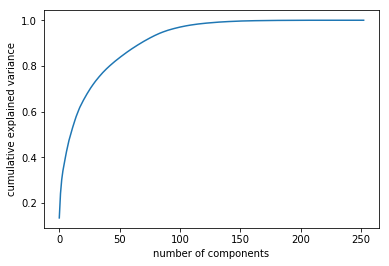

In [60]:
#set scalar
scaler = StandardScaler()
scaler.fit(X_train2017)
X_train_pc = scaler.transform(X_train2017)

#fit pca to scaled train set
pca = PCA().fit(X_train_pc)
#plot explained variance ratio curve
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#label x title
plt.xlabel('number of components')
#label y title
plt.ylabel('cumulative explained variance');

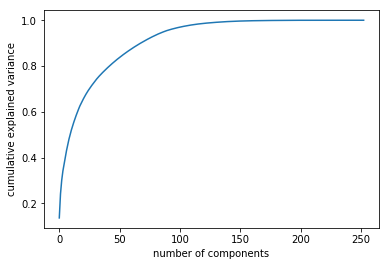

In [61]:
#set scalar
scaler = StandardScaler()
scaler.fit(X_train2018)
X_train_pc = scaler.transform(X_train2018)

#fit pca to scaled train set
pca = PCA().fit(X_train_pc)
#plot explained variance ratio curve
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#label x title
plt.xlabel('number of components')
#label y title
plt.ylabel('cumulative explained variance');

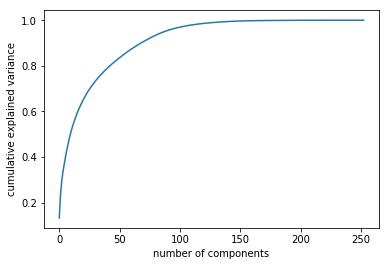

In [62]:
#set scalar
scaler = StandardScaler()
scaler.fit(X_train2019)
X_train_pc = scaler.transform(X_train2019)

#fit pca to scaled train set
pca = PCA().fit(X_train_pc)
#plot explained variance ratio curve
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#label x title
plt.xlabel('number of components')
#label y title
plt.ylabel('cumulative explained variance');

In [64]:
making = 2017
for i in [[X_train2017, y_train2017, X_test2017, y_test2017], [X_train2018, y_train2018, X_test2018, y_test2018],
         [X_train2019, y_train2019, X_test2019, y_test2019]]:
    
    print(making)
    print('')
    print('')

    random_state = 42
    classifiers = [XGBClassifier(random_state = random_state),
                   LogisticRegression(random_state=random_state),
                   RandomForestClassifier(random_state=random_state)]

    params = [
        {'clf__n_estimators': [20,50,100],
         'clf__max_depth':[3,4,5,6],
         'pca__n_components':list(range(40,101))}, ## xgboost

        {'clf__C':[0.001, .01, .10, 0.50, 0.75, 1.0, 10, 100],
         'pca__n_components': list(range(40,101))}, ## Logistic Regression

        {'clf__n_estimators': [20,50,100],
         'clf__criterion': ['entropy', 'gini'],
         'clf__max_depth':[None,3,4,5,6],
         'pca__n_components':list(range(60,101))} ## randomforestclassifier
    ]


    exec(f"pipelines{making} = []")
    exec(f"best_clfs{making} = []")
    for clf,param in zip(classifiers,params):
        pipe = Pipeline([('scl', StandardScaler()),
                         ('pca', PCA()),
                         ('clf', clf)])
        gs = GridSearchCV(estimator=pipe,
                      param_grid=param,
                      scoring='accuracy',
                      cv=3,
                      verbose=5,
                      n_jobs=-1)
        gs.fit(i[0], i[1])
        exec(f"best_clfs{making}.append(gs.best_estimator_)")
        exec(f"pipelines{making}.append(pipe)")
        print(clf.__class__.__name__)
        print('Best params:', gs.best_params_)
        print('Train Accuracy:',gs.best_estimator_.score(i[0], i[1]))
        print('Test Accuracy:',gs.best_estimator_.score(i[2], i[3]))
        print('')
    making += 1

2017


Fitting 3 folds for each of 732 candidates, totalling 2196 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 2196 out of 2196 | elapsed: 12.1min finished


XGBClassifier
Best params: {'clf__max_depth': 5, 'clf__n_estimators': 100, 'pca__n_components': 89}
Train Accuracy: 0.9746102449888642
Test Accuracy: 0.7931034482758621

Fitting 3 folds for each of 488 candidates, totalling 1464 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1464 out of 1464 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


LogisticRegression
Best params: {'clf__C': 0.001, 'pca__n_components': 61}
Train Accuracy: 0.8178173719376391
Test Accuracy: 0.7931034482758621

Fitting 3 folds for each of 1230 candidates, totalling 3690 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 3690 out of 3690 | elapsed: 11.9min finished


RandomForestClassifier
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__n_estimators': 100, 'pca__n_components': 77}
Train Accuracy: 1.0
Test Accuracy: 0.8275862068965517

2018


Fitting 3 folds for each of 732 candidates, totalling 2196 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2196 out of 2196 | elapsed: 12.3min finished


XGBClassifier
Best params: {'clf__max_depth': 6, 'clf__n_estimators': 100, 'pca__n_components': 72}
Train Accuracy: 0.9947727272727273
Test Accuracy: 0.5714285714285714

Fitting 3 folds for each of 488 candidates, totalling 1464 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1464 out of 1464 | elapsed:  1.2min finished


LogisticRegression
Best params: {'clf__C': 10, 'pca__n_components': 58}
Train Accuracy: 0.7809090909090909
Test Accuracy: 0.6428571428571429

Fitting 3 folds for each of 1230 candidates, totalling 3690 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 3690 out of 3690 | el

RandomForestClassifier
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__n_estimators': 100, 'pca__n_components': 83}
Train Accuracy: 1.0
Test Accuracy: 0.6785714285714286

2019


Fitting 3 folds for each of 732 candidates, totalling 2196 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 2196 out of 2196 | elapsed: 14.1min finished


XGBClassifier
Best params: {'clf__max_depth': 5, 'clf__n_estimators': 100, 'pca__n_components': 87}
Train Accuracy: 0.9740496244024585
Test Accuracy: 0.6071428571428571

Fitting 3 folds for each of 488 candidates, totalling 1464 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1464 out of 1464 | elapsed:  1.6min finished


LogisticRegression
Best params: {'clf__C': 0.001, 'pca__n_components': 100}
Train Accuracy: 0.7684953334850899
Test Accuracy: 0.5714285714285714

Fitting 3 folds for each of 1230 candidates, totalling 3690 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 3690 out of 3690 | el

RandomForestClassifier
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__n_estimators': 100, 'pca__n_components': 89}
Train Accuracy: 1.0
Test Accuracy: 0.6428571428571429



In [69]:
making = 2017
for i in [[X_train2017, y_train2017, X_test2017, y_test2017], [X_train2018, y_train2018, X_test2018, y_test2018],
         [X_train2019, y_train2019, X_test2019, y_test2019]]:
    
    print(making)
    print('')
    print('')

    random_state = 42
    classifiers = [RandomForestClassifier(random_state=random_state)]

    params = [{'clf__n_estimators': [100, 150, 1000],
              'clf__max_depth':[None],
              'clf__criterion': ['entropy'],
              'pca__n_components':list(range(70,101))}]


    exec(f"pipelines{making} = []")
    exec(f"best_clfs{making} = []")
    for clf,param in zip(classifiers,params):
        pipe = Pipeline([('scl', StandardScaler()),
                         ('pca', PCA()),
                         ('clf', clf)])
        gs = GridSearchCV(estimator=pipe,
                      param_grid=param,
                      scoring='accuracy',
                      cv=3,
                      verbose=5,
                      n_jobs=-1)
        gs.fit(i[0], i[1])
        exec(f"best_clfs{making}.append(gs.best_estimator_)")
        exec(f"pipelines{making}.append(pipe)")
        print(clf.__class__.__name__)
        print('Best params:', gs.best_params_)
        print('Train Accuracy:',gs.best_estimator_.score(i[0], i[1]))
        print('Test Accuracy:',gs.best_estimator_.score(i[2], i[3]))
        print('')
    making += 1

2017


Fitting 3 folds for each of 93 candidates, totalling 279 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 279 out of 279 | elapsed: 11.1min finished


RandomForestClassifier
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__n_estimators': 1000, 'pca__n_components': 75}
Train Accuracy: 1.0
Test Accuracy: 0.8275862068965517

2018


Fitting 3 folds for each of 93 candidates, totalling 279 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 279 out of 279 | elapsed: 11.0min finished


RandomForestClassifier
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__n_estimators': 1000, 'pca__n_components': 96}
Train Accuracy: 1.0
Test Accuracy: 0.6071428571428571

2019


Fitting 3 folds for each of 93 candidates, totalling 279 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 279 out of 279 | elapsed: 11.3min finished


RandomForestClassifier
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__n_estimators': 1000, 'pca__n_components': 93}
Train Accuracy: 1.0
Test Accuracy: 0.6071428571428571

